In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Module_Analysis/')
import Pair_Corelation_Function as PCF
#import Clustering as Clust
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Gillespie_backend')
import Gillespie_backend as backend
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Fixed_number_of_linkers/')
import Simulate_System as SimSys
sys.path.append('/home/hcleroy/Extra_Module_py/')
import formated_matplotlib

In [36]:
# define the unit of the system :
dimension = 3

L = 1000
NLinker = 20

EbHigh = -10.

kdiff = 0.000207352*5

seed = np.random.randint(0,1000000)

## Look at the equilibration of the system:
In the file clustering_analysis, we noticed that the system can equilibrate with such a binding energy. Which means that the linkers clusterize around the [0,0,0] central linker. We now look at the evolution of the distribution of binding distance.

In [37]:
Sys = backend.Gillespie(    ell_tot=L,
                            rho0=0.,
                            BindingEnergy=EbHigh,
                            kdiff=kdiff,
                            seed = seed,
                            Nlinker=NLinker,
                            dimension=dimension)

In [38]:
Sim = SimSys.Simulation(step_tot = 10**5,Gillespie = Sys)
Sim.simulate_eq_distribution()

In [39]:
Sim.move

array([0.36018, 0.27947, 0.     , 0.36035])

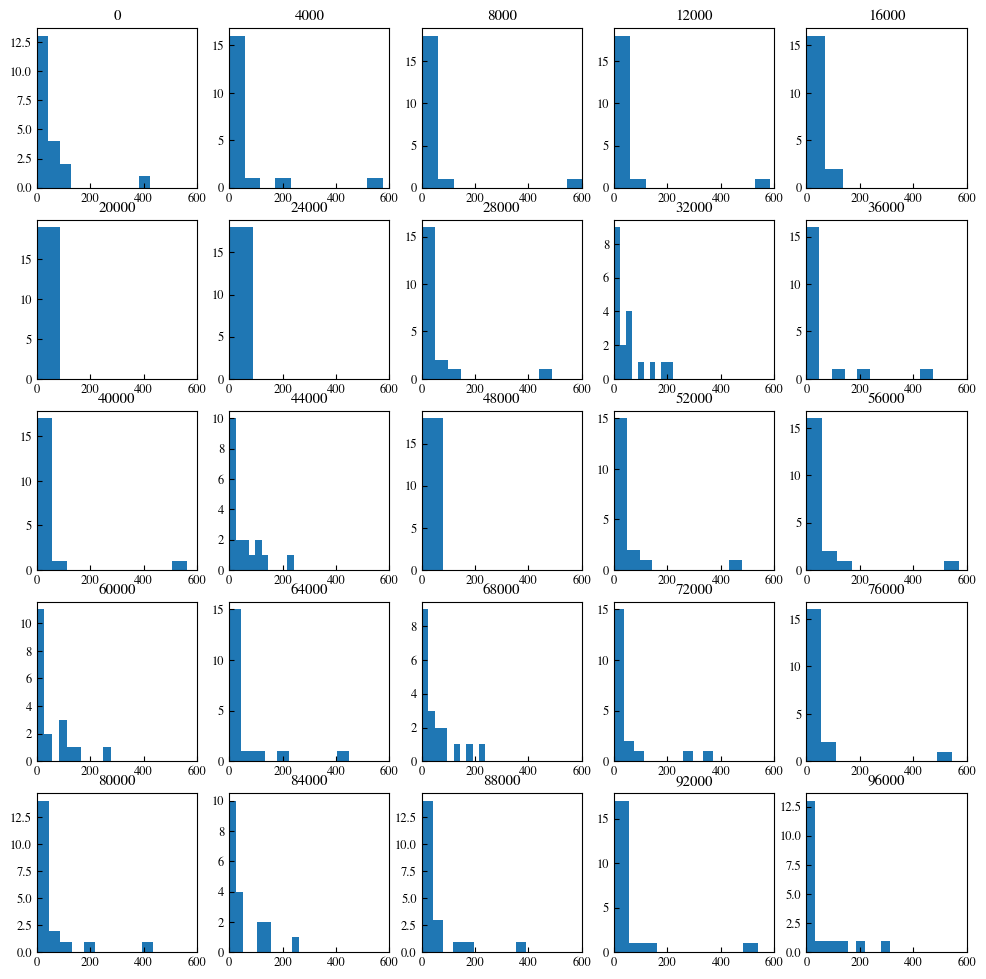

In [32]:
fig,ax = plt.subplots(nrows=5,ncols=5,figsize=(12,12))
DN = Sim.L.shape[0]//25
for i in range(25):
    ax[i//5,i%5].hist(Sim.L[(i+1)*DN-1:(i+1)*DN].flatten()[np.where(Sim.L[(i+1)*DN-1:(i+1)*DN].flatten()!=0)])
    ax[i//5,i%5].set_title(i*DN)
    ax[i//5,i%5].set_xlim(0,600)

Look at the position of linkers in space

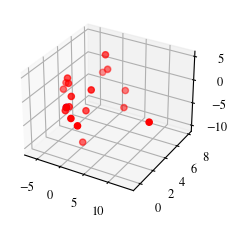

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random data
x = Sim.R[-1][:,0]
y = Sim.R[-1][:,1]
z = Sim.R[-1][:,2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(0, 0, 0, c='blue', marker='o')

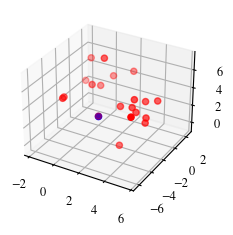

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random data
x = Sim.R[-1][:,0]
y = Sim.R[-1][:,1]
z = Sim.R[-1][:,2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(0, 0, 0, c='blue', marker='o')